### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tf_utils as tfu
import unets as un

## Training

### Prepare Training Set

Image batch shape: (16, 256, 256, 3)
Mask batch shape: (16, 256, 256, 1)


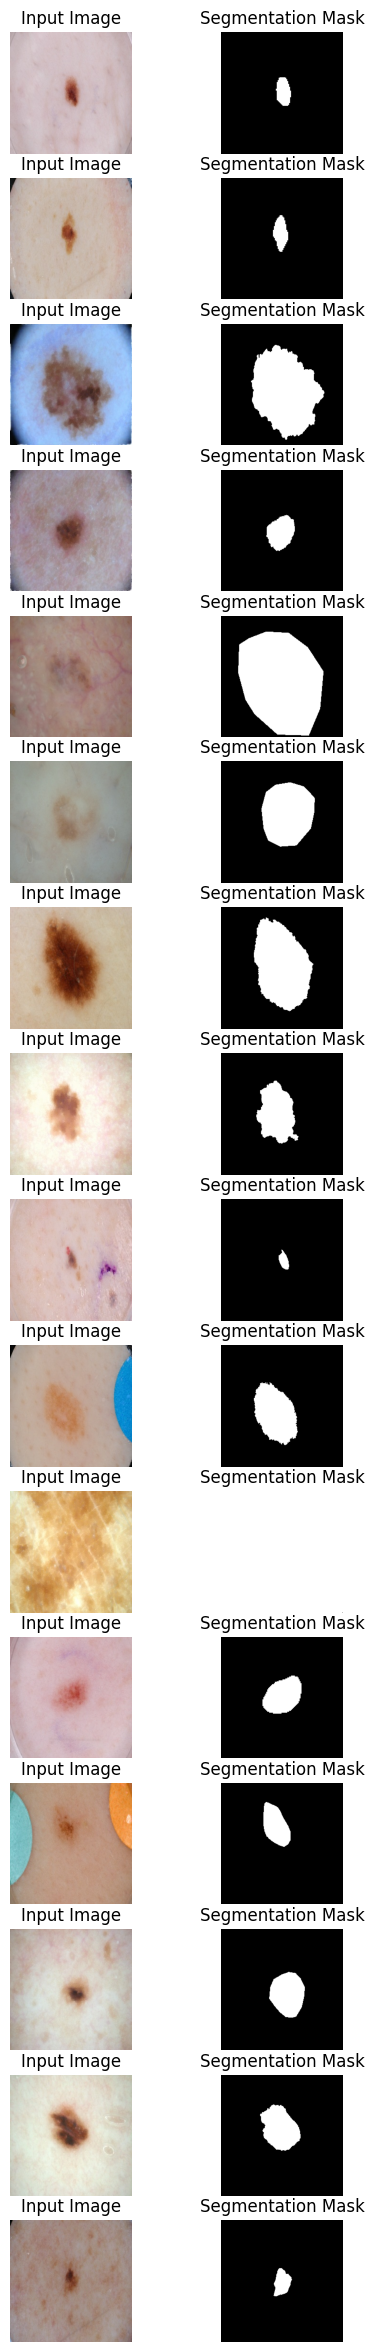

In [2]:
# Set the directory paths
train_image_folder = 'ISIC-Merged\\train_images'
train_mask_folder = 'ISIC-Merged\\train_masks'

# Load the dataset
train_dataset = tfu.load_data(train_image_folder, train_mask_folder)

# Check the dataset shapes (optional)
for images, masks in train_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Mask batch shape:", masks.shape)

    plt.figure(figsize=(5, 30))  # Adjust figure size

    for i in range(16):  # Loop through first batch
        # Display the input image
        plt.subplot(16, 2, 2 * i + 1)  # Arrange in 16 rows, 2 columns
        plt.imshow(images[i].numpy())  # Convert tensor to NumPy
        plt.title("Input Image")
        plt.axis("off")

        # Display the corresponding mask
        plt.subplot(16, 2, 2 * i + 2)
        plt.imshow(masks[i].numpy().squeeze(), cmap="gray")  # Ensure grayscale
        plt.title("Segmentation Mask")
        plt.axis("off")

    plt.show()

### Prepare Validation set

Image batch shape: (16, 256, 256, 3)
Mask batch shape: (16, 256, 256, 1)


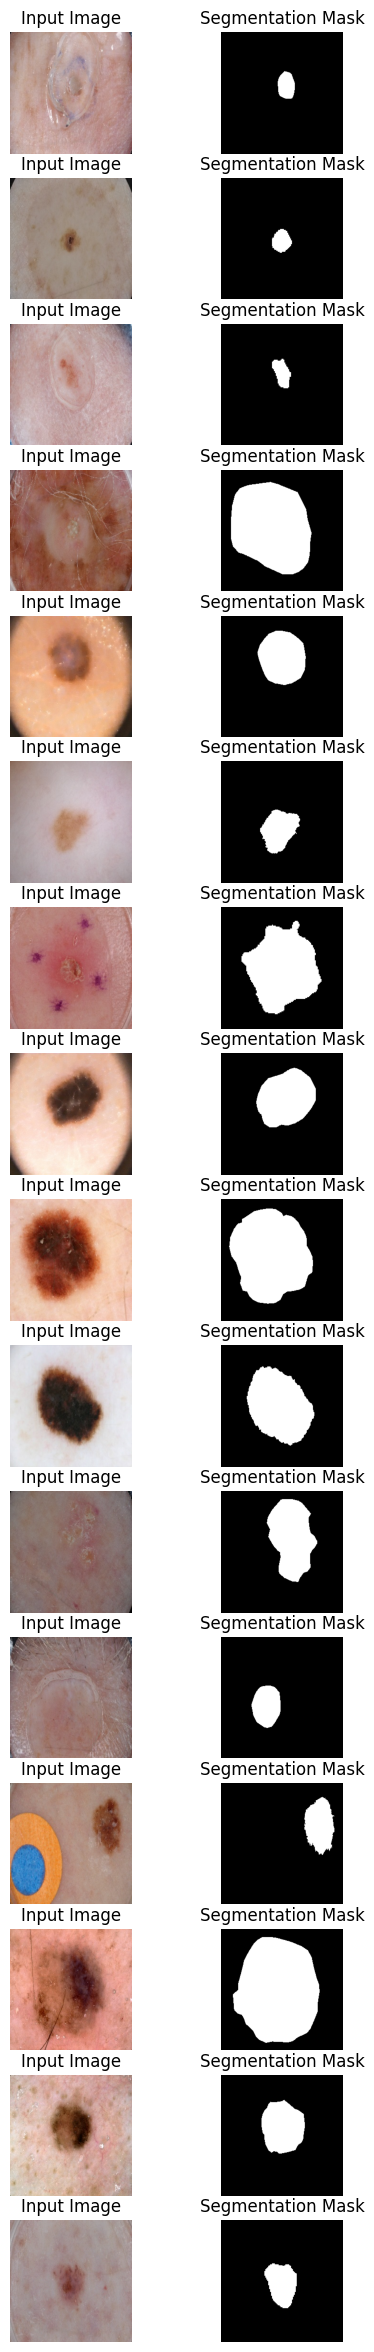

In [3]:
# Set the directory paths
valid_image_folder = 'ISIC-Merged\\val_images'
valid_mask_folder = 'ISIC-Merged\\val_masks'

# Load the dataset
valid_dataset = tfu.load_data(valid_image_folder, valid_mask_folder)

# Check the dataset shapes (optional)
for images, masks in valid_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Mask batch shape:", masks.shape)

    plt.figure(figsize=(5, 30))  # Adjust figure size

    for i in range(16):  # Loop through first batch
        # Display the input image
        plt.subplot(16, 2, 2 * i + 1)  # Arrange in 16 rows, 2 columns
        plt.imshow(images[i].numpy())  # Convert tensor to NumPy
        plt.title("Input Image")
        plt.axis("off")

        # Display the corresponding mask
        plt.subplot(16, 2, 2 * i + 2)
        plt.imshow(masks[i].numpy().squeeze(), cmap="gray")  # Ensure grayscale
        plt.title("Segmentation Mask")
        plt.axis("off")

    plt.show()

### Instantiate the network

In [4]:
# Instantiate the model
unet = un.UNet4(input_size=(256, 256, 3), num_classes=1)

# Call the model with a random input to build the model
out = unet.call(tf.random.normal((1, 256, 256, 3)))
print(out.shape) # Make sure the output shape is correct

unet.summary()

(1, 256, 256, 1)


Model: "u_net4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (1, 256, 256, 64)      │        39,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (1, 128, 128, 128)     │       222,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (1, 64, 64, 256)       │       887,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (1, 32, 32, 512)       │     3,544,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (1, 16, 16, 1024)      │    14,166,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (1, 32, 32, 512)       │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (1, 32, 32, 512)       │     7,083,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (1, 64, 64, 256)       │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (1, 64, 64, 256)       │     1,772,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (1, 128, 128, 128)     │       131,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (1, 128, 128, 128)     │       443,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (1, 256, 256, 64)      │        32,832 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (1, 256, 256, 64)      │       111,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (1, 256, 256, 1)       │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

### Check GPU availability

In [5]:
# Determine the number of GPUs available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

print("TensorFlow version", tf.__version__)

print("GPU Details: ", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  0
[]
TensorFlow version 2.19.0
GPU Details:  []


### Callbacks

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor="val_loss",   # Monitor validation loss
    patience=16,           # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True # Restore best weights after stopping
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",   # Monitor validation loss
    factor=0.5,           # Reduce LR by half when plateauing
    patience=5,           # Wait 5 epochs before reducing LR
    min_lr=1e-6           # Set a minimum learning rate
)

### Compile and Train

In [ ]:
# Compile the model
unet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1.0), 
    loss=tfu.bce_dice_loss,
    metrics=[tfu.jaccard_index])

# Train the model
history = unet.fit(
    train_dataset, 
    validation_data=valid_dataset,
    epochs=200, # Adjust the number of epochs as needed
    callbacks=[early_stopping, reduce_lr])

### Save the model

In [ ]:
# Save the model in native Keras format
unet.save('unet_model.keras')

# Save only the model weights in HDF5 format
unet.save_weights("unet_weights.weights.h5")

## Testing

### Preparing Testing set

In [ ]:
# Set the directory paths
test_image_folder = 'ISIC-Merged\\test_images'
test_mask_folder = 'ISIC-Merged\\test_masks'

# Load the dataset
test_dataset = tfu.load_data(test_image_folder, test_mask_folder)

# Check the dataset shapes (optional)
for images, masks in test_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Mask batch shape:", masks.shape)

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = unet.evaluate(test_dataset)

## History

In [ ]:
import json

# Save history to a JSON file
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

### Training and Validation Loss

In [ ]:
# Load history from JSON file
with open('training_history.json', 'r') as f:
    loaded_history = json.load(f)

# Example: Access training and validation loss
train_loss = loaded_history['loss']
val_loss = loaded_history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Training and Validation Jaccard Index

In [ ]:
# Load history from JSON file
with open('training_history.json', 'r') as f:
    loaded_history = json.load(f)

# Example: Access training and validation loss
train_jaccard_idx = loaded_history['jaccard_index']
val_jaccard_idx = loaded_history['val_jaccard_index']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_jaccard_idx, label='Training Jaccard Index', color='blue')
plt.plot(epochs, val_jaccard_idx, label='Validation Jaccard Index', color='red', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Jaccard Index')
plt.legend()
plt.grid(True)
plt.show()